## Setup

In [65]:
#!pip install tensorflow-datasets

In [3]:

from sklearn.model_selection import train_test_split
import numpy as np
#import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import copy
from scipy.stats import entropy
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
# import tensorflow_datasets as tfds
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Clean Data

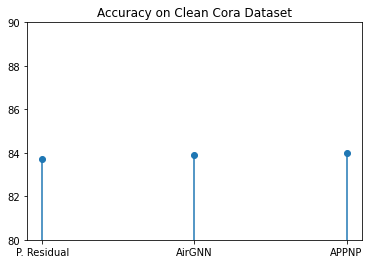

In [13]:
baseAccCora = [83.7, 83.9, 84.0] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean Cora Dataset");
plt.ylim(80.0, 90.0);
plt.xticks(x,models);

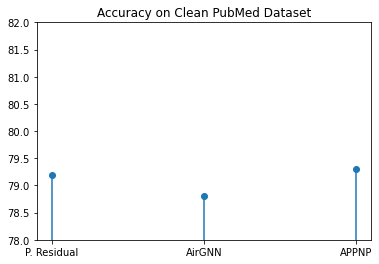

In [18]:
baseAccCora = [79.2, 78.8, 79.3] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean PubMed Dataset");
plt.ylim(78.0, 82.0);
plt.xticks(x,models);

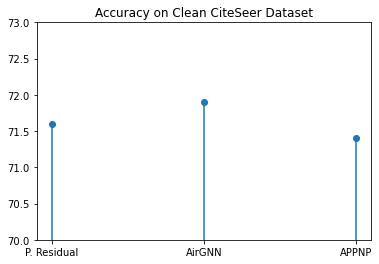

In [16]:
baseAccCora = [71.6, 71.9, 71.4] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean CiteSeer Dataset");
plt.ylim(70.0, 73);
plt.xticks(x,models);

# Adversarial Plots

In [ ]:
###Cora

pres = [94.8,93.8,93.5,92.3,89.5,83.0,66.5,63.7] 
airG = 100*[0.913, 0.913, 0.913, 0.910, 0.907, 0.897, 0.890, 0.875]
app = 100*[0.908, 0.882 , 0.837,0.802,0.738, 0.600, 0.412,0.387]
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean CiteSeer Dataset");
plt.ylim(70.0, 73);
plt.xticks(x,models);

In [ ]:
#cite seer

pres = [96.8,96.8,96.5,94.8,95.7,91.7,83.0,80.5] 
airG = [] 
app = []#  {0: '0.890 ± 0.029', 1: '0.885 ± 0.024', 2: '0.867 ± 0.031', 5: '0.832 ± 0.037', 10: '0.815 ± 0.024', 20: '0.757 ± 0.026', 50: '0.670 ± 0.011', 80: '0.655 ± 0.011'}
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean CiteSeer Dataset");
plt.ylim(70.0, 73);
plt.xticks(x,models);

In [ ]:
## pubmed

pres = [89.8, 67.5,82.3,62.7,56.7,56.7,56.7] 
airG = []
app = []  ##0: '0.895 ± 0.016', 1: '0.680 ± 0.016', 2: '0.635 ± 0.029', 5: '0.530 ± 0.023', 10: '0.515 ± 0.017', 20: '0.515 ± 0.017', 50: '0.515 ± 0.017', 80: '0.515 ± 0.017'}

models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean CiteSeer Dataset");
plt.ylim(70.0, 73);
plt.xticks(x,models);